In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')

• Remove empty columns & rows

• Test loading results based on question numbers

• Make bar graphs for each question in set, divide by section

QUESTION FORMAT: Qa.b_c where a is the section (starting at 0), b is the question, and c is the subquestion

note some Qa.b.d_c - might need to rename/fix 

• summarize results from text inputs - them

• old survey - probably direct counts on the graphs

• my survey - do comparison bar graphs out of 100%

t test data

# Figure 3: Use of testing

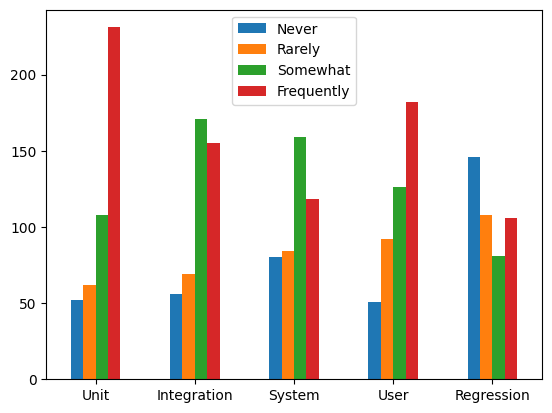

In [ ]:
UNIT = URSSI["Q1.4_1"][2:]
INTEGRATION = URSSI["Q1.4_2"][2:]
SYSTEM = URSSI["Q1.4_3"][2:]
USER = URSSI["Q1.4_4"][2:]
REGRESSION = URSSI["Q1.4_5"][2:]
set(REGRESSION)
INDEX = ['Unit' ,'Integration', 'System', 'User', 'Regression']
NEVERS = [
    THING.value_counts()['Never']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
RARELYS = [
    THING.value_counts()['Rarely']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
SOMEWHATS = [
    THING.value_counts()['Somewhat']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
FREQUENTLYS = [
    THING.value_counts()['Frequently']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
df = pd.DataFrame({'Never': NEVERS,
                   'Rarely': RARELYS,
                   'Somewhat': SOMEWHATS,
                   'Frequently': FREQUENTLYS}, index=INDEX)
ax1 = df.plot.bar(rot=0)

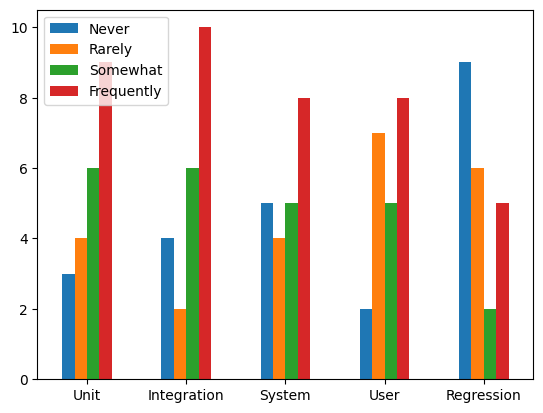

In [ ]:
# question segments
UNIT = IRSEM["Q1.4_1"][2:]
INTEGRATION = IRSEM["Q1.4_2"][2:]
SYSTEM = IRSEM["Q1.4_3"][2:]
USER = IRSEM["Q1.4_4"][2:]
REGRESSION = IRSEM["Q1.4_5"][2:]

set(REGRESSION)

# labels
INDEX = ['Unit' ,'Integration', 'System', 'User', 'Regression']

# gets counts of each possible text answer
NEVERS = [
    THING.value_counts()['Never']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
RARELYS = [
    THING.value_counts()['Rarely']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
SOMEWHATS = [
    THING.value_counts()['Somewhat']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]
FREQUENTLYS = [
    THING.value_counts()['Frequently']
    for THING in [UNIT, INTEGRATION, SYSTEM, USER, REGRESSION]
]

df = pd.DataFrame({'Never': NEVERS,
                   'Rarely': RARELYS,
                   'Somewhat': SOMEWHATS,
                   'Frequently': FREQUENTLYS}, index=INDEX)
ax1 = df.plot.bar(rot=0)

Figure 4: Availability of tool support. (Question 2.2)

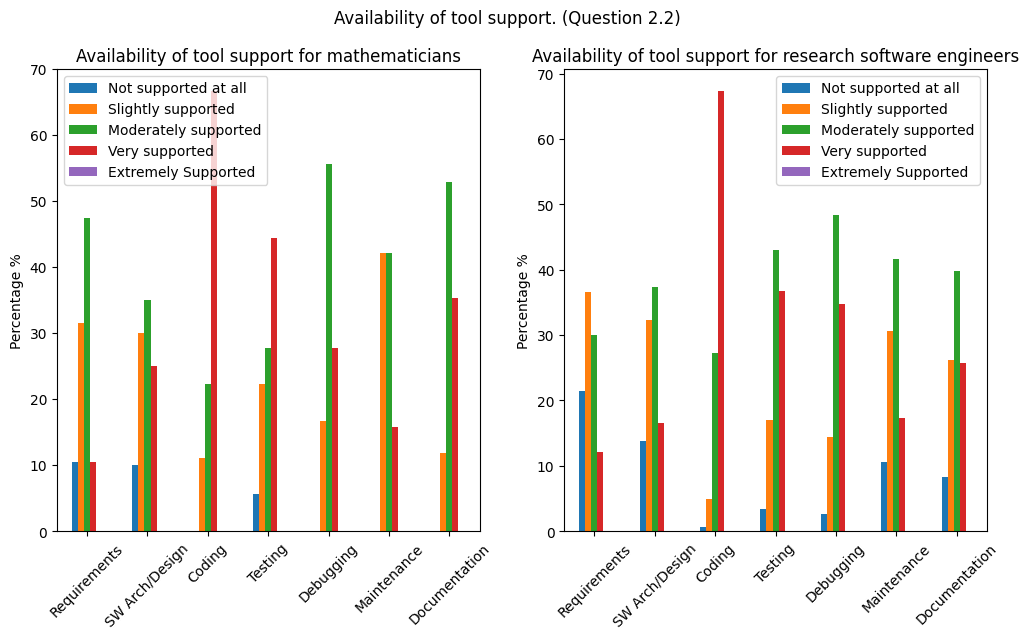

In [43]:

# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

# select question / question segments
SURVEY = IRSEM
QUESTIONS = [
    ('Requirements',            SURVEY["Q2.2_1"][2:]), 
    ('SW Arch/Design',          SURVEY["Q2.2_2"][2:]), 
    ('Coding',                  SURVEY["Q2.2_3"][2:]), 
    ('Testing',                 SURVEY["Q2.2_4"][2:]), 
    ('Debugging',               SURVEY["Q2.2_5"][2:]), 
    ('Maintenance',             SURVEY["Q2.2_6"][2:]), 
    ('Documentation',           SURVEY["Q2.2_7"][2:])]

# possible text answers
Answer_types = [
    'Not supported at all',
    'Slightly supported',
    'Moderately supported',
    'Very supported', 
    'Extremely Supported' 
]
# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
SURVEY = URSSI
QUESTIONS = [
    ('Requirements',            SURVEY["Q2.2_1"][2:]), 
    ('SW Arch/Design',          SURVEY["Q2.2_2"][2:]), 
    ('Coding',                  SURVEY["Q2.2_3"][2:]), 
    ('Testing',                 SURVEY["Q2.2_4"][2:]), 
    ('Debugging',               SURVEY["Q2.2_5"][2:]), 
    ('Maintenance',             SURVEY["Q2.2_6"][2:]), 
    ('Documentation',           SURVEY["Q2.2_7"][2:])]

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Availability of tool support. (Question 2.2)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Availability of tool support for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Availability of tool support for research software engineers')
ax2.set_ylabel('Percentage %')
ax2.tick_params('x',labelrotation=45)

plt.gcf().set_size_inches(12, 6)
plt.show()
